<a href="https://colab.research.google.com/github/Anderson-olv/infnet-cluster/blob/K-Medoids/K_Medoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.8 MB/s eta 0:00:00


In [2]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn_extra.cluster import KMedoids
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Etapa 1: Carregamento dos dados
filepath = "/content/sample_data/Country-data.csv"
df = pd.read_csv(filepath)

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df.iloc[:, 1:]),
    columns=df.columns[1:],
    index=df["country"]
)

print("Dados carregados e escalados.")

Dados carregados e escalados.


In [5]:
# Etapa 2: Aplicação do K-Medoids
n_clusters = 3
kmedoid = KMedoids(n_clusters=n_clusters, random_state=42).fit(df_scaled)
df_scaled["cluster"] = kmedoid.labels_
cluster_centers = kmedoid.cluster_centers_

print(f"K-Medoids aplicado com {n_clusters} clusters.")

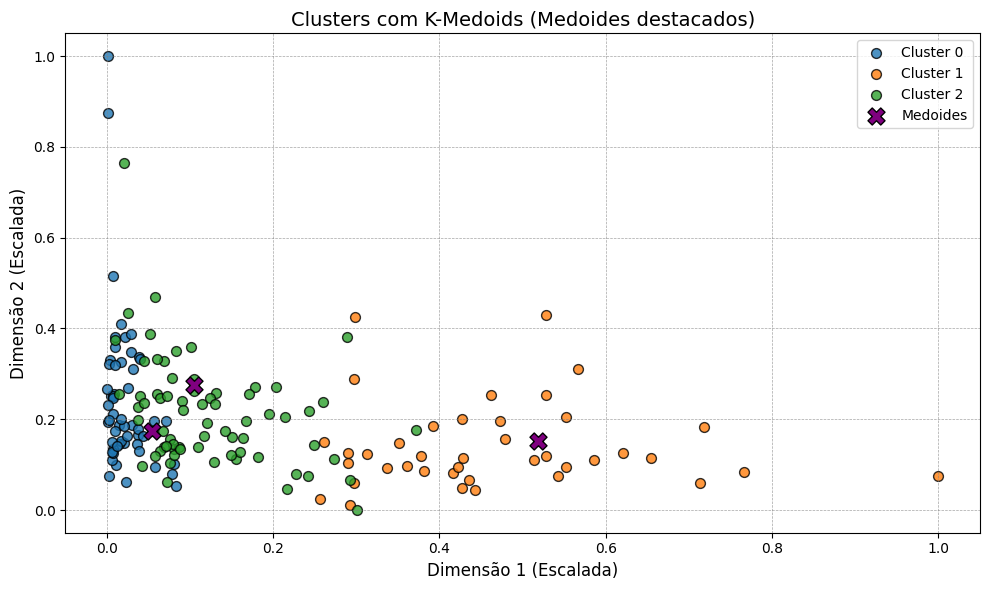

In [6]:
# Etapa 3: Plotagem dos clusters com K-Medoids
cluster_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
plt.figure(figsize=(10, 6))

for cluster_id, color in enumerate(cluster_colors):
    cluster_points = df_scaled[df_scaled["cluster"] == cluster_id].iloc[:, :-1]
    plt.scatter(
        cluster_points.iloc[:, 0],
        cluster_points.iloc[:, 1],
        c=color,
        label=f"Cluster {cluster_id}",
        s=50,
        alpha=0.8,
        edgecolors="black"
    )

plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    c="purple",
    label="Medoides",
    s=150,
    marker="X",
    edgecolors="black"
)

plt.title("Clusters com K-Medoids (Medoides destacados)", fontsize=14)
plt.xlabel("Dimensão 1 (Escalada)", fontsize=12)
plt.ylabel("Dimensão 2 (Escalada)", fontsize=12)
plt.legend(fontsize=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [7]:
# Etapa 4: Identificação dos países representativos
representative_countries = []
for cluster_id in range(n_clusters):
    cluster_center = cluster_centers[cluster_id]
    cluster_points = df_scaled[df_scaled["cluster"] == cluster_id].iloc[:, :-1]
    distances = euclidean_distances(cluster_points, [cluster_center])
    closest_idx = distances.argmin()
    representative_country = cluster_points.index[closest_idx]
    representative_countries.append((cluster_id, representative_country))
    print(f"Cluster {cluster_id}: País representativo - {representative_country}")


Cluster 0: País representativo - Bahamas
Cluster 1: País representativo - Guinea
Cluster 2: País representativo - Paraguay


In [8]:
# Etapa 5: Criação do gráfico
df_scaled.reset_index(inplace=True)
df_scaled.rename(columns={"index": "country"}, inplace=True)
df_scaled["cluster"] = df_scaled["cluster"].map({0: "Grupo A", 1: "Grupo B", 2: "Grupo C"})

fig = px.choropleth(
    df_scaled,
    locations="country",
    locationmode="country names",
    color="cluster",
    title="Distribuição dos Grupos (K-Medoids)",
    color_discrete_map={"Grupo A": "#1f77b4", "Grupo B": "#ff7f0e", "Grupo C": "#2ca02c"}
)

fig.update_geos(
    visible=True,
    resolution=50,
    showframe=True,
    framecolor="gray"
)
fig.update_layout(
    legend_title_text="Grupos",
    title_font=dict(size=18, family="Arial"),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=0.00,
        xanchor="center",
        x=0.5
    )
)
fig.show()